### **Análise das Questões**

#### **Bibliotecas**

In [2]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [3]:
# Visualização das Colunas
pd.set_option('display.max_columns', None)

#### **Importar Dados**

In [4]:
df_original = pd.read_parquet("dados/enems_subamostra.parquet", columns = [
                              'NU_INSCRICAO', 'NU_ANO', 
                              'TP_PRESENCA_LC', 'TP_PRESENCA_CN', 
                              'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 
                              'TP_LINGUA'])

In [5]:
df_mapeado = pd.read_parquet('dados/enems_subamostra_mapeado.parquet')

In [6]:
df_codigos_gabaritos = pd.read_csv('dados/Corresp_quest_ENEM - GABARITO PROVAS.csv')

In [7]:
df_mapeando_obj = pd.read_csv('dados/Corresp_quest_ENEM - COMPILADO_OBJ.csv')

#### **Filtro & Formatação Inicial** 

In [8]:
df_original = df_original.rename(columns = {
                                'NU_INSCRICAO': 'nu_inscricao', 'NU_ANO': 'ano',
                                'TP_PRESENCA_LC': 'presenca_d1', 'TP_PRESENCA_CN': 'presenca_d2', 
                                'NU_NOTA_LC': 'tri_lc', 'NU_NOTA_CH': 'tri_ch', 'NU_NOTA_CN': 'tri_cn', 'NU_NOTA_MT': 'tri_mt',
                                'TP_LINGUA': 'lingua'
                                })

In [9]:
df = df_original.copy()

In [10]:
df.head(3)

,nu_inscricao,ano,presenca_d1,presenca_d2,tri_lc,tri_ch,tri_cn,tri_mt,lingua
0,190001004651,2019,1,1,485.1,417.2,412.5,446.2,1
1,190001004662,2019,1,1,478.5,492.8,511.9,432.8,1
2,190001004736,2019,1,1,574.2,570.9,465.0,614.0,0


In [11]:
len(df)

300000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nu_inscricao  300000 non-null  int64  
 1   ano           300000 non-null  int64  
 2   presenca_d1   300000 non-null  int64  
 3   presenca_d2   300000 non-null  int64  
 4   tri_lc        202899 non-null  float64
 5   tri_ch        202899 non-null  float64
 6   tri_cn        192071 non-null  float64
 7   tri_mt        192071 non-null  float64
 8   lingua        300000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 20.6 MB


#### **Mapeando Respostas**

In [13]:
df_mapeado.head(3)

,NU_INSCRICAO,TX_RESPOSTAS_CN_AZUL,TX_RESPOSTAS_CH_AZUL,TX_RESPOSTAS_LC_AZUL,TX_RESPOSTAS_MT_AZUL
0,190001004651,ADDDDBDDDDDCEDACCEDBEEBDBBEEDABADAEEECBECACAB,ACBCABACAABBDCDCBCDADABADABDACCCBCAECDDEEBCCB,99999BCEBBDCBDEBDDCAAEDEBEDBECCDEDEAEBAACDAEBB...,CEDDDDBCBBDCBDECCAACCEAAAEBABABCEBDACDDCBABEB
1,190001004662,EDECACDDEDBEADEADBCAEBADAACEDCAEEDEBDCBADBBCA,CCDCDBCACBDBEAAAEECDCBCBBDDEBDBDAAEBBABAECCCB,99999EBABDBDBBDDBACCBADEBDCCECEACCAAABDEADDEBA...,BEDBADCCBECDBDDBACACABBAABDEBADD*EDBDCECBDCAB
2,190001004736,DEECDEDBCCBDACBABEDAADCDBBEEAEABBDDCACCEBDABA,BCECABCACBECADEAEBCBCADCEABEEADBAADAABBDEAADE,BECDE99999CCBAABADEBDAAECADECCECECCCEBDABDADBC...,ECEBDBCBDBAABDEACEAEDADACEADBAECECEAACECAEADB


In [14]:
df_mapeado = df_mapeado.rename(columns = {
                                'NU_INSCRICAO': 'nu_inscricao',
                                'TX_RESPOSTAS_LC_AZUL': 'respostas_lc', 'TX_RESPOSTAS_CH_AZUL': 'respostas_ch', 'TX_RESPOSTAS_CN_AZUL': 'respostas_cn', 'TX_RESPOSTAS_MT_AZUL': 'respostas_mt'
                                })

In [15]:
df_mapeado = df_mapeado[['nu_inscricao', 'respostas_lc', 'respostas_ch','respostas_cn','respostas_mt']]

In [16]:
df = pd.merge(df, df_mapeado, on = 'nu_inscricao', how = 'left')

#### **Validação**

In [17]:
# Ano: 2022
df = df[df['ano'] == 2023]
df = df.drop(columns = ['ano'], errors = 'ignore')

In [18]:
# Concluintes da prova toda
df = df[(df['presenca_d1'] == 1) & (df['presenca_d2'] == 1)]
df = df.drop(columns = ['presenca_d1', 'presenca_d2'], errors = 'ignore')

In [19]:
# Todos receberam notas
print(df[df[['tri_lc', 'tri_ch', 'tri_cn', 'tri_mt']].isna().any(axis=1)])

Empty DataFrame
Columns: [nu_inscricao, tri_lc, tri_ch, tri_cn, tri_mt, lingua, respostas_lc, respostas_ch, respostas_cn, respostas_mt]
Index: []


In [20]:
df = df.dropna(subset=['respostas_lc', 'respostas_ch', 'respostas_cn', 'respostas_mt'])

In [21]:
df

,nu_inscricao,tri_lc,tri_ch,tri_cn,tri_mt,lingua,respostas_lc,respostas_ch,respostas_cn,respostas_mt
240001,210058036237,447.5,511.4,499.8,487.8,0,BBEBA99999DBDAEEECACAEDAEAEBEDDDBDBCCBDAADBBBB...,ECEDCBABADD.AADEAABBAECBCADECDDDDBEDBCADECEDD,DBCEDDCACDDBDDECBBBCCECBBEBDAECABABDDCAAEECAC,BCACDBBCDAABDDDCCBAAABACADEDDABABCBACCECBB.CC
240003,210058036273,591.8,648.6,647.7,690.0,0,BEDAB99999DADEBDCCDBAEADEDCBEDDECBAEAABAADADBB...,CDAEEAABAACEAADECBAAAECDCEBCBCDCADEABCEAEBDDB,DBEACDABCBDCDAECEDADCBEADEEEBAEDBBEACCDDABEED,CCBCDEBBCAABDEABDEBDABAEECDCEDCECAACDEBDEABCC
240007,210058036463,588.4,658.2,640.3,740.4,0,BBDAB99999DACEADDCEBAEDDCACCEBCAEAACCEDAADABBB...,CDADEDABEACEAABECBDAABCDCABADCDEBACABCEDEBDDB,DBEEBDABCCCECBECEBEDDDCBECCCBBCABBECDCBDACEEA,BCADDCABCBABCEDBCEBDABDDCADBDEEBDDBCBBEDEABCC
240008,210058036521,685.4,671.1,657.6,587.5,1,99999ABEBADACAEDCCDBADCDEDCCEBBACBACAACAADACCB...,DDAEEAABDACEAADECBDAABCDEABABCDBACAABCDDEBADC,DBEECDABBCDAEAECEDBADEBDABCCCEAEEBECEDEDEEDCE,BCDDDDBBCECDCDDABDBDDBBCBCDDEBCBDDBBDBEACACDD
240009,210058036625,501.9,457.4,398.0,451.1,1,99999ABDDACEDADCBCBBBBCDEDCAABBADBBCBABAAEABBB...,CEAEDEDDAEEEABBEADCBBCDDAECECCDAEABADCCDDBADE,EBDBBCBEADCECBDADCABEACAEEDEBEECBBDEBEBBCDADD,CBCBACECDACDAADCECDDEBCDEDCDDBACBCABDAEEDABCB
...,...,...,...,...,...,...,...,...,...,...
299993,210062061309,481.8,429.5,493.4,594.9,0,BECBB99999DEDABCCADCCDEAABCBEEAECEDEBABACEEBBB...,AAAAAABDBACCCCDEACEDDBEDEEEAACBEEDACBBBABCEEA,DBACAABDDECCCEACABBDEDABEDBAEAAEBCEDCCBECEDED,BAECEBCADCECCDABEECAABBBEDEDEAADCDBDAEECEABCC
299994,210062061468,545.3,518.8,470.1,614.5,0,BCEAB99999DBAEEDABDBBBBDADCDEEBEBBCDBCBACCACBB...,CDCECCABBAEEEEDEDDCAABEDDDBEDCADCBECDBEBABEDA,EDCCBABCBACEEEBADBAACAAAEBACABAABABCACADADCAB,CDCCDEDBCBCDADDCAEACADCDEADEDDCADDACACEEBBCDC
299995,210062061543,547.0,464.0,530.2,430.9,0,BCCAA99999DBCACDBCDBADEDCDABEDEABDABBBCAABBCDB...,CEEDDBAEACCACBAEBADEADBDACBEABDDCDBEACDAAACDA,DBDBCCEBCAEDDABBCBEBEDCAEDDBCBBDCDABDCBDAEBEA,BDEDBBBCEDDAAADBDCADAACCEDCDDBABCABDCEBAEDBDC
299996,210062061582,541.9,545.1,560.9,457.9,0,BBBAC99999DABEEDDC.CAACDDAAAEBCBBEAEBABAACAEBB...,CACCBAABDCCBAADECDDBABCDDABABCDBCAEAACBBABEDA,EBEEDDECCABECEBAEBDCABBAACDEBBAABBECCCBDACBEB,CDACBBCDDCBBBCACBEDAAEBEECDDDCDECDCBEBDDBDACD


#### **Vetor Respostas LC**

In [22]:
df['respostas_lc'] = df.apply(
    lambda x: x['respostas_lc'][:5] + x['respostas_lc'][10:] if x['lingua'] == 0 
    else x['respostas_lc'][5:], axis=1
)

#### **Obter Gabaritos**

In [23]:
# Gabaritos simples conforme a prova azul 2023
gabarito_ch = df_codigos_gabaritos[(df_codigos_gabaritos['cor'] == 'Azul') & 
                                   (df_codigos_gabaritos['ano'] == 2023) &
                                   (df_codigos_gabaritos['prova'] == 'CH')]['gabarito'].iloc[0]

gabarito_cn = df_codigos_gabaritos[(df_codigos_gabaritos['cor'] == 'Azul') & 
                                   (df_codigos_gabaritos['ano'] == 2023) &
                                   (df_codigos_gabaritos['prova'] == 'CN')]['gabarito'].iloc[0]

gabarito_mt = df_codigos_gabaritos[(df_codigos_gabaritos['cor'] == 'Azul') & 
                                   (df_codigos_gabaritos['ano'] == 2023) &
                                   (df_codigos_gabaritos['prova'] == 'MT')]['gabarito'].iloc[0]

In [24]:
# Filtrando os gabaritos para inglês e espanhol
gabarito_lc = df_codigos_gabaritos[(df_codigos_gabaritos['cor'] == 'Azul') & 
                                   (df_codigos_gabaritos['ano'] == 2023) &
                                   (df_codigos_gabaritos['prova'] == 'LC')]['gabarito'].iloc[0]

gabarito_lc_ingles = gabarito_lc[0:5] + gabarito_lc[10:]
gabarito_lc_espanhol = gabarito_lc[5:]

#### **Vetor de Acertos**

In [25]:
# Função para comparar respostas e gabarito gerando um vetor de 0s e 1s
def compare_respostas(respostas, gabarito):
    return np.array([1 if r == g else 0 for r, g in zip(respostas, gabarito)])

In [26]:
df_respostas = df.copy()

In [27]:
# Comparando e criando as novas colunas de acertos
df_respostas['acertos_lc'] = df_respostas.apply(
    lambda row: compare_respostas(row['respostas_lc'], gabarito_lc_ingles if row['lingua'] == 0 else gabarito_lc_espanhol),
    axis=1
)

df_respostas['acertos_ch'] = df_respostas['respostas_ch'].apply(
    lambda x: compare_respostas(x, gabarito_ch)
)

df_respostas['acertos_cn'] = df_respostas['respostas_cn'].apply(
    lambda x: compare_respostas(x, gabarito_cn)
)

df_respostas['acertos_mt'] = df_respostas['respostas_mt'].apply(
    lambda x: compare_respostas(x, gabarito_mt)
)

# Convertendo o vetor binário para um número
df_respostas['acertos_lc'] = df_respostas['acertos_lc'].apply(lambda x: ''.join(map(str, x)))
df_respostas['acertos_ch'] = df_respostas['acertos_ch'].apply(lambda x: ''.join(map(str, x)))
df_respostas['acertos_cn'] = df_respostas['acertos_cn'].apply(lambda x: ''.join(map(str, x)))
df_respostas['acertos_mt'] = df_respostas['acertos_mt'].apply(lambda x: ''.join(map(str, x)))

# Exibindo o DataFrame com as novas colunas
df_respostas.head()


,nu_inscricao,tri_lc,tri_ch,tri_cn,tri_mt,lingua,respostas_lc,respostas_ch,respostas_cn,respostas_mt,acertos_lc,acertos_ch,acertos_cn,acertos_mt
240001,210058036237,447.5,511.4,499.8,487.8,0,BBEBADBDAEEECACAEDAEAEBEDDDBDBCCBDAADBBBBCBAA,ECEDCBABADD.AADEAABBAECBCADECDDDDBEDBCADECEDD,DBCEDDCACDDBDDECBBBCCECBBEBDAECABABDDCAAEECAC,BCACDBBCDAABDDDCCBAAABACADEDDABABCBACCECBB.CC,110001000100100100010001000000100011000110010,000000111000111100001010110000100100110110010,110001000000101100001000100000000000010001000,110000000000000000001100110010010000101000011
240003,210058036273,591.8,648.6,647.7,690.0,0,BEDABDADEBDCCDBAEADEDCBEDDECBAEAABAADADBBEAAE,CDAEEAABAACEAADECBAAAECDCEBCBCDCADEABCEAEBDDB,DBEACDABCBDCDAECEDADCBEADEEEBAEDBBEACCDDABEED,CCBCDEBBCAABDEABDEBDABAEECDCEDCECAACDEBDEABCC,101111101011111100111101000101011011010111111,111110111111111111011011101001101001110011011,111101110001101101001001000000010110110110111,010001011000011101111100001000100001000011111
240007,210058036463,588.4,658.2,640.3,740.4,0,BBDABDACEADDCEBAEDDCACCEBCAEAACCEDAADABBBEAAB,CDADEDABEACEAABECBDAABCDCABADCDEBACABCEDEBDDB,DBEEBDABCCCECBECEBEDDDCBECCCBBCABBECDCBDACEEA,BCADDCABCBABCEDBCEBDABDDCADBDEEBDDBCBBEDEABCC,111111111010101100100111111001100011010111110,111010110111110111111111111111110001110111011,111011110100011100000000000100000111010110110,110100111100110101111111001011000101011011111
240008,210058036521,685.4,671.1,657.6,587.5,1,ABEBADACAEDCCDBADCDEDCCEBBACBACAACAADACCBEAAE,DDAEEAABDACEAADECBDAABCDEABABCDBACAABCDDEBADC,DBEECDABBCDAEAECEDBADEBDABCCCEAEEBECEDEDEEDCE,BCDDDDBBCECDCDDABDBDDBBCBCDDEBCBDDBBDBEACACDD,101111110111111110111111101101111111011011111,011110110111111111111111011101101011111111110,111001110100001101000000010110101111001101000,110100011001100010110100001000100100011001000
240009,210058036625,501.9,457.4,398.0,451.1,1,ABDDACEDADCBCBBBBCDEDCAABBADBBCBABAAEABBBCCAA,CEAEDEDDAEEEABBEADCBBCDDAECECCDAEABADCCDDBADE,EBDBBCBEADCECBDADCABEACAEEDEBEECBBDEBEBBCDADD,CBCBACECDACDAADCECDDEBCDEDCDDBACBCABDAEEDABCB,100010000000101000111100101000101011010110010,101100001001100100000001000001100001010101110,010010000000010010010101000000000100000000001,001000000001000000010101010010000000001001110


In [28]:
df_assinaladas = df_respostas.copy()

In [29]:
df_respostas = df_respostas.drop(columns = ['respostas_lc', 'respostas_ch', 'respostas_cn', 'respostas_mt'], errors = 'ignore')

In [30]:
# Contando o número de 1s em cada coluna de acertos
df_respostas['pontos_lc'] = df_respostas['acertos_lc'].str.count('1')
df_respostas['pontos_ch'] = df_respostas['acertos_ch'].str.count('1')
df_respostas['pontos_cn'] = df_respostas['acertos_cn'].str.count('1')
df_respostas['pontos_mt'] = df_respostas['acertos_mt'].str.count('1')

df_respostas['pontos_prova'] = df_respostas['pontos_lc'] + df_respostas['pontos_ch'] + df_respostas['pontos_cn'] + df_respostas['pontos_mt']

In [31]:
df_respostas.head()

,nu_inscricao,tri_lc,tri_ch,tri_cn,tri_mt,lingua,acertos_lc,acertos_ch,acertos_cn,acertos_mt,pontos_lc,pontos_ch,pontos_cn,pontos_mt,pontos_prova
240001,210058036237,447.5,511.4,499.8,487.8,0,110001000100100100010001000000100011000110010,000000111000111100001010110000100100110110010,110001000000101100001000100000000000010001000,110000000000000000001100110010010000101000011,14,18,10,12,54
240003,210058036273,591.8,648.6,647.7,690.0,0,101111101011111100111101000101011011010111111,111110111111111111011011101001101001110011011,111101110001101101001001000000010110110110111,010001011000011101111100001000100001000011111,31,33,24,20,108
240007,210058036463,588.4,658.2,640.3,740.4,0,111111111010101100100111111001100011010111110,111010110111110111111111111111110001110111011,111011110100011100000000000100000111010110110,110100111100110101111111001011000101011011111,30,36,20,29,115
240008,210058036521,685.4,671.1,657.6,587.5,1,101111110111111110111111101101111111011011111,011110110111111111111111011101101011111111110,111001110100001101000000010110101111001101000,110100011001100010110100001000100100011001000,38,37,21,17,113
240009,210058036625,501.9,457.4,398.0,451.1,1,100010000000101000111100101000101011010110010,101100001001100100000001000001100001010101110,010010000000010010010101000000000100000000001,001000000001000000010101010010000000001001110,18,16,9,11,54


In [32]:
df_respostas[['pontos_lc', 'pontos_ch', 'pontos_cn', 'pontos_mt', 'pontos_prova']].describe()

,pontos_lc,pontos_ch,pontos_cn,pontos_mt,pontos_prova
count,40515.000000,40515.000000,40515.000000,40515.000000,40515.000000
mean,21.514402,21.995656,12.537233,15.144440,71.191731
std,7.522139,8.420927,5.077473,7.165648,24.243517
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,15.000000,9.000000,10.000000,53.000000
50%,21.000000,21.000000,12.000000,14.000000,67.000000
75%,27.000000,28.000000,15.000000,19.000000,86.000000
max,43.000000,45.000000,44.000000,45.000000,166.000000


In [33]:
df_respostas[df_respostas['pontos_prova'] >= 165]

,nu_inscricao,tri_lc,tri_ch,tri_cn,tri_mt,lingua,acertos_lc,acertos_ch,acertos_cn,acertos_mt,pontos_lc,pontos_ch,pontos_cn,pontos_mt,pontos_prova
246145,210058458157,696.0,738.8,776.1,958.6,0,111111100101111110101111101111111111111111111,111111111111111111111111101111101001111111111,111111111111111101100111111110111111111111111,111111111111111111111111111111111111111111111,39,41,41,45,166
254810,210059061262,718.7,757.2,773.2,919.1,0,111111011111111111111111101101111011111111111,111111111101111111111110111111111111111111111,011111110111111111111111010111111111110111111,110111111111011111111111101111111111111111111,41,43,40,42,166
265747,210059788369,695.8,770.9,790.3,912.1,0,101111111111011110101110101111111111111111111,111110011111111111111111111111111111111111111,111101110111111111011111101111111111111111111,111001111111111111111101111111111111111111111,39,43,41,42,165
281342,210060822190,754.2,725.8,795.5,904.2,0,111111111110111111111111101111111111111111111,111111110111111111111111111011111010111111111,111011111111110111110110111111011111111111111,111111111110111111111111101111111101111110111,43,41,40,41,165
297661,210061895823,705.9,744.6,777.4,934.8,0,111111011111111111111111101111110111011011111,111110111111111111111111101111101110111111111,111011111101111111110111111110111111111111101,111111111111111111111111011111111111111111111,40,41,40,44,165


#### **Visualização da Distribuição**

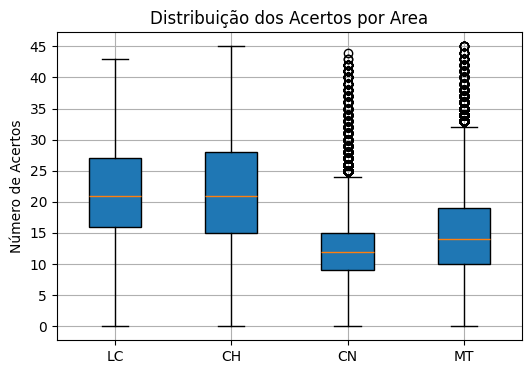

In [34]:
# Criando o boxplot para as colunas de pontos
plt.figure(figsize=(6, 4))

# Definindo os dados para o boxplot
data = [df_respostas['pontos_lc'], df_respostas['pontos_ch'], df_respostas['pontos_cn'], df_respostas['pontos_mt']]

# Criando o boxplot
plt.boxplot(data, vert=True, patch_artist=True, tick_labels=['LC', 'CH', 'CN', 'MT'])

# Adicionando título e rótulos
plt.title('Distribuição dos Acertos por Area')
plt.ylabel('Número de Acertos')

# Ajustando o eixo y para marcar de 5 em 5
plt.yticks(range(0, 46, 5))  # Ajuste o limite conforme necessário
plt.grid(True)

# Exibindo o gráfico
plt.show()

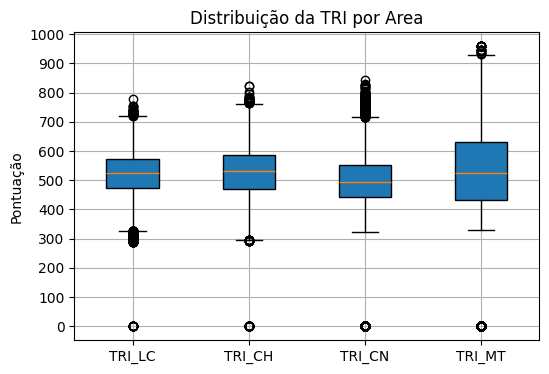

In [35]:
# Criando o boxplot para as colunas de pontos
plt.figure(figsize=(6, 4))

# Definindo os dados para o boxplot
data = [df_respostas['tri_lc'], df_respostas['tri_ch'], df_respostas['tri_cn'], df_respostas['tri_mt']]

# Criando o boxplot
plt.boxplot(data, vert=True, patch_artist=True, tick_labels=['TRI_LC', 'TRI_CH', 'TRI_CN', 'TRI_MT'])

# Adicionando título e rótulos
plt.title('Distribuição da TRI por Area')
plt.ylabel('Pontuação')

# Ajustando o eixo y para marcar de 5 em 5
plt.yticks(range(0, 1001, 100))  # Ajuste o limite conforme necessário
plt.grid(True)

# Exibindo o gráfico
plt.show()

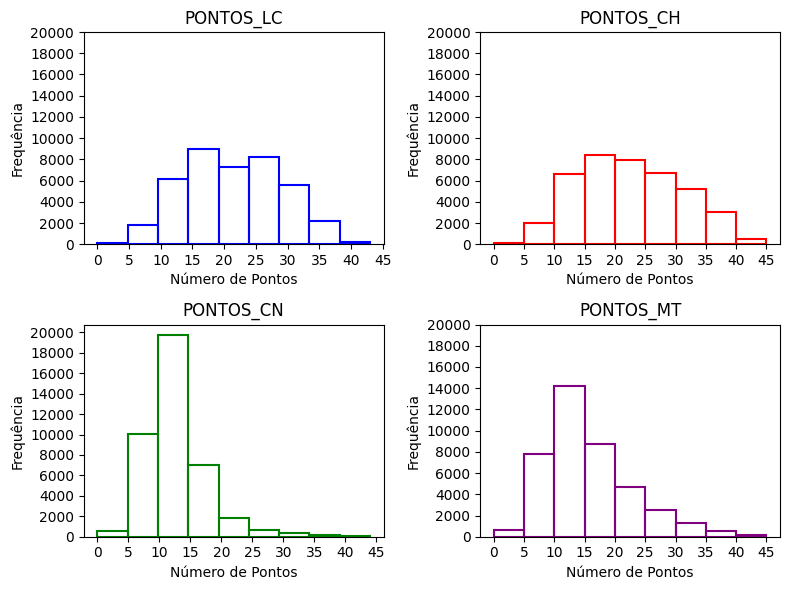

In [36]:
plt.figure(figsize=(8, 6))

# Primeiro gráfico - PONTOS_LC
plt.subplot(2, 2, 1)  # 2 linhas, 2 colunas, posição 1
sns.histplot(df_respostas['pontos_lc'], kde=False, bins=9, color='blue', edgecolor='black', fill=False)
plt.title('PONTOS_LC')
plt.xlabel('Número de Pontos')
plt.ylabel('Frequência')
plt.xticks(range(0, 46, 5)) 
plt.yticks(range(0, 20001, 2000)) 

# Segundo gráfico - PONTOS_CH
plt.subplot(2, 2, 2)  # 2 linhas, 2 colunas, posição 2
sns.histplot(df_respostas['pontos_ch'], kde=False, bins=9, color='red', edgecolor='black', fill=False)
plt.title('PONTOS_CH')
plt.xlabel('Número de Pontos')
plt.ylabel('Frequência')
plt.xticks(range(0, 46, 5)) 
plt.yticks(range(0, 20001, 2000)) 

# Terceiro gráfico - PONTOS_CN
plt.subplot(2, 2, 3)  # 2 linhas, 2 colunas, posição 3
sns.histplot(df_respostas['pontos_cn'], kde=False, bins=9, color='green', edgecolor='black', fill=False)
plt.title('PONTOS_CN')
plt.xlabel('Número de Pontos')
plt.ylabel('Frequência')
plt.xticks(range(0, 46, 5)) 
plt.yticks(range(0, 20001, 2000))  

# Quarto gráfico - PONTOS_MT
plt.subplot(2, 2, 4)  # 2 linhas, 2 colunas, posição 4
sns.histplot(df_respostas['pontos_mt'], kde=False, bins=9, color='purple', edgecolor='black', fill=False)
plt.title('PONTOS_MT')
plt.xlabel('Número de Pontos')
plt.ylabel('Frequência')
plt.xticks(range(0, 46, 5)) 
plt.yticks(range(0, 20001, 2000)) 

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo o gráfico
plt.show()

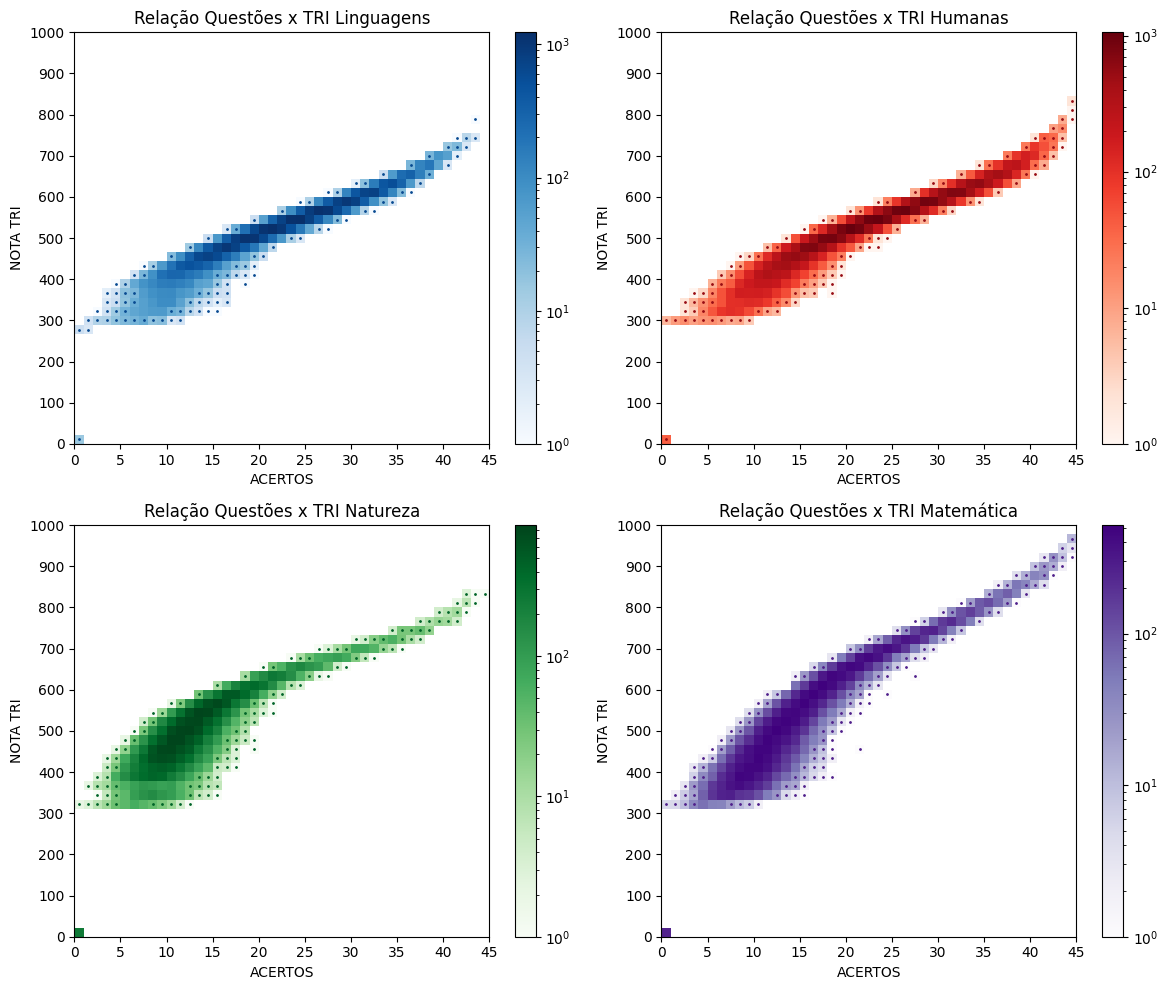

In [37]:
plt.figure(figsize=(12, 10))

n_bins = 45  # deve ser menor que 45

x_edges = np.linspace(0, 45, n_bins + 1)
y_edges = np.linspace(0, 1000, n_bins + 1)

def plot_hist2d_with_dots(ax, x, y, bins, cmap_name, title):
    cmap = plt.get_cmap(cmap_name)
    
    # Histograma 2D com escala logarítmica
    h, xedges, yedges, img = ax.hist2d(x, y, bins=bins, cmap=cmap, norm=colors.LogNorm())
    
    # Cor forte da paleta escolhida
    point_color = cmap(0.9)
    
    # Calcular centros dos bins
    x_centers = 0.5 * (xedges[:-1] + xedges[1:])
    y_centers = 0.5 * (yedges[:-1] + yedges[1:])
    
    # Adicionar pontos coloridos onde a contagem está entre 1 e 0.5% do total
    for i in range(len(x_centers)):
        for j in range(len(y_centers)):
            if 0 < h[i, j] < 0.001 * len(x):
                ax.scatter(x_centers[i], y_centers[j], color=point_color, s=1)

    ax.set_title(title)
    ax.set_xlabel('ACERTOS')
    ax.set_ylabel('NOTA TRI')
    ax.set_xticks(range(0, 46, 5))
    ax.set_yticks(range(0, 1001, 100))
    plt.colorbar(img, ax=ax)

# Gráfico 1 - Linguagens
ax1 = plt.subplot(2, 2, 1)
plot_hist2d_with_dots(ax1, df_respostas['pontos_lc'], df_respostas['tri_lc'],
                      bins=[x_edges, y_edges], cmap_name='Blues',
                      title='Relação Questões x TRI Linguagens')

# Gráfico 2 - Humanas
ax2 = plt.subplot(2, 2, 2)
plot_hist2d_with_dots(ax2, df_respostas['pontos_ch'], df_respostas['tri_ch'],
                      bins=[x_edges, y_edges], cmap_name='Reds',
                      title='Relação Questões x TRI Humanas')

# Gráfico 3 - Natureza
ax3 = plt.subplot(2, 2, 3)
plot_hist2d_with_dots(ax3, df_respostas['pontos_cn'], df_respostas['tri_cn'],
                      bins=[x_edges, y_edges], cmap_name='Greens',
                      title='Relação Questões x TRI Natureza')

# Gráfico 4 - Matemática
ax4 = plt.subplot(2, 2, 4)
plot_hist2d_with_dots(ax4, df_respostas['pontos_mt'], df_respostas['tri_mt'],
                      bins=[x_edges, y_edges], cmap_name='Purples',
                      title='Relação Questões x TRI Matemática')

plt.tight_layout()
plt.show()


#### **Métricas Questões**

In [38]:
def contar_1s_por_questao(df, coluna):
    # Inicializando um dicionário para armazenar os contadores de "1"
    contagem_1s = []
    
    # Determinando o comprimento máximo da string
    max_len = df[coluna].apply(len).max()
    
    # Contando os 1s por posição de caractere
    for i in range(max_len):
        count_1 = df[coluna].str[i].apply(lambda x: 1 if x == '1' else 0).sum()
        contagem_1s.append((i+1, count_1))  # Armazenando o índice (1-based) e a contagem de 1s
    
    # Convertendo para DataFrame
    contagem_df = pd.DataFrame(contagem_1s, columns=['questao', 'indice'])
    contagem_df['indice'] = contagem_df['indice'] / len(df)
    return contagem_df


In [39]:
# Chamando a função e exibindo o resultado
resultado_lc = contar_1s_por_questao(df_respostas, 'acertos_lc')
resultado_ch = contar_1s_por_questao(df_respostas, 'acertos_ch')
resultado_cn = contar_1s_por_questao(df_respostas, 'acertos_cn')
resultado_mt = contar_1s_por_questao(df_respostas, 'acertos_mt')

In [40]:
resultado = pd.concat([resultado_lc, resultado_ch, resultado_cn, resultado_mt], ignore_index = False).reset_index()
resultado = resultado.drop(columns = ['index'], errors = 'ignore')

In [41]:
resultado['indice'].describe()

count    180.000000
mean       0.395510
std        0.180661
min        0.085326
25%        0.261767
50%        0.368431
75%        0.509262
max        0.912082
Name: indice, dtype: float64

#### **Margem TRI Acertos**

#### **Assinaladas por Questão**

In [43]:
# Número de questões (tamanho do vetor de respostas)
num_questoes = len(df_assinaladas['respostas_ch'].iloc[0])

# Criar um DataFrame para armazenar as contagens
contagem_respostas = pd.DataFrame(columns=['questao', 'A', 'B', 'C', 'D', 'E', 'sem_resposta'])

# Iterar sobre cada questão (posição na string de respostas)
for i in range(num_questoes):
    contagem = {'questao': i + 1}  # Iniciamos com o número da questão
    # Contar quantas vezes cada letra aparece na posição 'i' de todas as respostas
    for letra in 'ABCDE':  # Ajuste conforme o número de alternativas
        contagem[letra] = df_assinaladas['respostas_ch'].str[i].value_counts().get(letra, 0)
    
    # Contando quantas respostas não são de 'ABCDE'
    contagem['sem_resposta'] = df_assinaladas['respostas_ch'].str[i].apply(lambda x: x not in 'ABCDE').sum()
    
    # Usando pd.concat() para adicionar a nova linha ao DataFrame
    contagem_respostas = pd.concat([contagem_respostas, pd.DataFrame([contagem])], ignore_index=True)


In [44]:
contagem_respostas['total'] = contagem_respostas['A'] + contagem_respostas['B'] + contagem_respostas['C'] + contagem_respostas['D'] + contagem_respostas['E'] + contagem_respostas['sem_resposta']

contagem_respostas['gabarito'] = [gabarito_ch[i] for i in range(len(gabarito_ch))]

In [45]:
# Função para calcular o índice de acerto
def calcular_indice_acerto(row):
    # Obtendo o gabarito da questão
    gabarito = row['gabarito']
    
    # Retornando a contagem de acertos correspondente ao gabarito
    return row[gabarito]  # A coluna com o nome do gabarito será o valor correto

# Aplicando a função para calcular a coluna 'indice_acerto'
contagem_respostas['indice_acerto'] = contagem_respostas.apply(calcular_indice_acerto, axis=1)

contagem_respostas['indice_acerto'] = contagem_respostas['indice_acerto'] / contagem_respostas['total']

# Garantir que a coluna 'indice_acerto' seja numérica
contagem_respostas['indice_acerto'] = pd.to_numeric(contagem_respostas['indice_acerto'], errors='coerce')

# Arredondando a coluna 'indice_acerto' para 2 casas decimais
contagem_respostas['indice_acerto'] = contagem_respostas['indice_acerto'].round(2)


In [46]:
contagem_respostas

,questao,A,B,C,D,E,sem_resposta,total,gabarito,indice_acerto
0,1,3761,3356,26254,4982,1954,208,40515,C,0.65
1,2,5597,2581,2115,21131,8842,249,40515,D,0.52
2,3,15446,9203,8726,3595,3201,344,40515,A,0.38
3,4,6845,3029,2763,8186,19402,290,40515,E,0.48
4,5,10010,6534,9287,3720,10711,253,40515,E,0.26
5,6,13533,4131,15261,4625,2715,250,40515,C,0.38
6,7,14263,5622,2368,9743,8202,317,40515,A,0.35
7,8,2961,18377,6124,6530,6262,261,40515,B,0.45
8,9,12539,7912,7404,9075,3255,330,40515,A,0.31
9,10,21301,3243,7531,3683,4501,256,40515,A,0.53


In [47]:
# Calcular a distribuição das respostas
distribuicao_abcde = (
    round(contagem_respostas['A'].sum() / (contagem_respostas['total'].iloc[0] * len(contagem_respostas)), 2), 
    round(contagem_respostas['B'].sum() / (contagem_respostas['total'].iloc[0] * len(contagem_respostas)), 2),
    round(contagem_respostas['C'].sum() / (contagem_respostas['total'].iloc[0] * len(contagem_respostas)), 2),
    round(contagem_respostas['D'].sum() / (contagem_respostas['total'].iloc[0] * len(contagem_respostas)), 2),
    round(contagem_respostas['E'].sum() / (contagem_respostas['total'].iloc[0] * len(contagem_respostas)), 2)
)

# Calcular o gabarito das respostas
gabarito_abcde = (
    round(len(contagem_respostas[contagem_respostas['gabarito'] == 'A']) / len(gabarito_ch), 2),
    round(len(contagem_respostas[contagem_respostas['gabarito'] == 'B']) / len(gabarito_ch), 2),
    round(len(contagem_respostas[contagem_respostas['gabarito'] == 'C']) / len(gabarito_ch), 2),
    round(len(contagem_respostas[contagem_respostas['gabarito'] == 'D']) / len(gabarito_ch), 2),
    round(len(contagem_respostas[contagem_respostas['gabarito'] == 'E']) / len(gabarito_ch), 2)
)

# Exibindo os resultados
print(distribuicao_abcde)
print(gabarito_abcde)

(0.24, 0.18, 0.2, 0.21, 0.16)
(0.31, 0.18, 0.18, 0.2, 0.13)


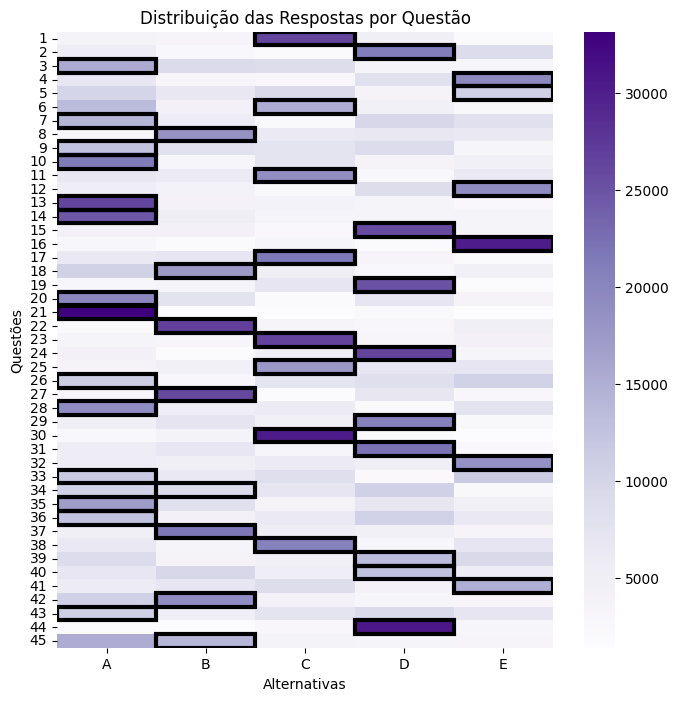

In [70]:
# Garantir que as colunas de respostas sejam numéricas
contagem_respostas[['A', 'B', 'C', 'D', 'E']] = contagem_respostas[['A', 'B', 'C', 'D', 'E']].apply(pd.to_numeric, errors='coerce')

# Visualizando as distribuições de respostas
heatmap_data = contagem_respostas[['A', 'B', 'C', 'D', 'E']]  # Selecionando apenas as colunas das alternativas

# Plotando o heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='Purples', cbar=True, xticklabels=['A', 'B', 'C', 'D', 'E'], yticklabels=contagem_respostas['questao'])

# Ajustando para desenhar um retângulo ao redor da célula da resposta correta
for i in range(len(contagem_respostas)):
    correct_answer = contagem_respostas.iloc[i]['gabarito']
    correct_col = list('ABCDE').index(correct_answer)  # Índice da alternativa correta
    # Adicionando o retângulo ao redor da célula correspondente à resposta correta
    ax.add_patch(plt.Rectangle((correct_col, i), 1, 1, fill=False, color='black', lw=3))  # Retângulo amarelo

plt.title('Distribuição das Respostas por Questão')
plt.xlabel('Alternativas')
plt.ylabel('Questões')
plt.show()

In [72]:
contagem_respostas['respostas_gabarito'] = contagem_respostas.apply(
    lambda row: row[row['gabarito']], axis=1
)

# Função para ordenar os valores de A a E em ordem decrescente
def ordenar_respostas(row):
    opcoes = {letra: row[letra] for letra in 'ABCDE'}
    ordenadas = sorted(opcoes.values(), reverse=True)  # apenas os valores, ordenados
    return pd.Series(ordenadas, index=['1', '2', '3', '4', '5'])

# Aplicando a função ao DataFrame
contagem_ordenada = contagem_respostas[['questao', 'respostas_gabarito']].copy()
contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_respostas.apply(ordenar_respostas, axis=1)

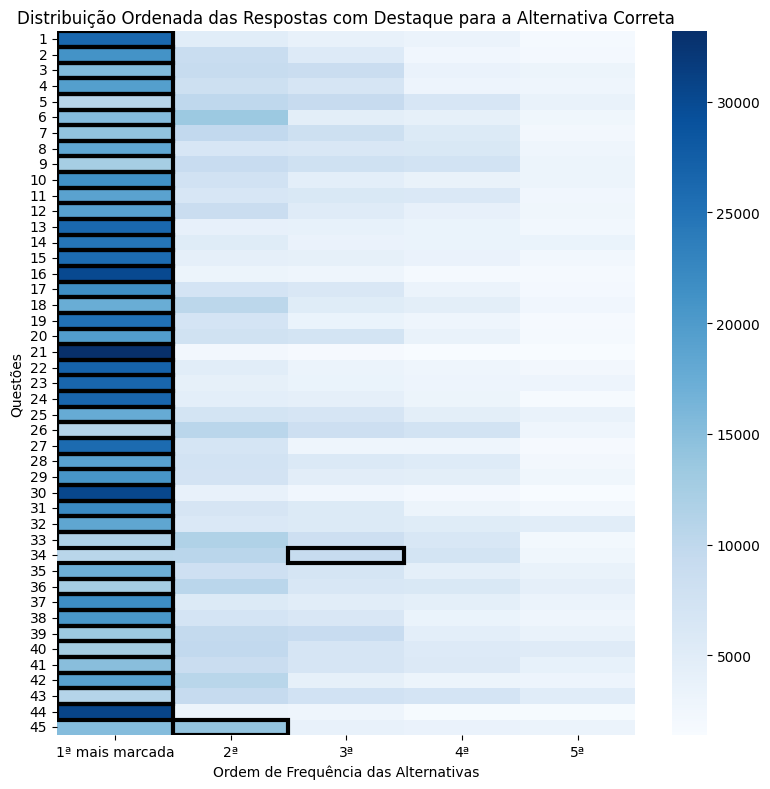

In [73]:
# Garantir que as colunas estejam no tipo numérico
contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = contagem_ordenada[['1', '2', '3', '4', '5']]

# Criar o heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Blues', cbar=True, 
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'], 
                 yticklabels=contagem_ordenada['questao'])

# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(contagem_ordenada['respostas_gabarito']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()

In [50]:
df_margem = df_respostas.copy()

df_margem = df_margem[['tri_lc', 'pontos_lc', 'tri_ch', 'pontos_ch', 'tri_cn', 'pontos_cn', 'tri_mt', 'pontos_mt']]

In [51]:
# Agrupando os dados por pontos de cada matéria e calculando o TRI mínimo e máximo para cada uma delas
tri_min_max_lc = df_margem.groupby('pontos_lc')['tri_lc'].agg(['min', 'max']).rename(columns={'min': 'tri_lc_min', 'max': 'tri_lc_max'})
tri_min_max_ch = df_margem.groupby('pontos_ch')['tri_ch'].agg(['min', 'max']).rename(columns={'min': 'tri_ch_min', 'max': 'tri_ch_max'})
tri_min_max_cn = df_margem.groupby('pontos_cn')['tri_cn'].agg(['min', 'max']).rename(columns={'min': 'tri_cn_min', 'max': 'tri_cn_max'})
tri_min_max_mt = df_margem.groupby('pontos_mt')['tri_mt'].agg(['min', 'max']).rename(columns={'min': 'tri_mt_min', 'max': 'tri_mt_max'})

# Combinando todas as tabelas em uma só
tri_min_max = tri_min_max_lc.join([tri_min_max_ch, tri_min_max_cn, tri_min_max_mt], how='outer')
tri_min_max = tri_min_max.drop(tri_min_max.index[0])

# Adicionando o índice como uma coluna chamada 'questao'
tri_min_max = tri_min_max.reset_index().rename(columns={'index': 'questoes'})

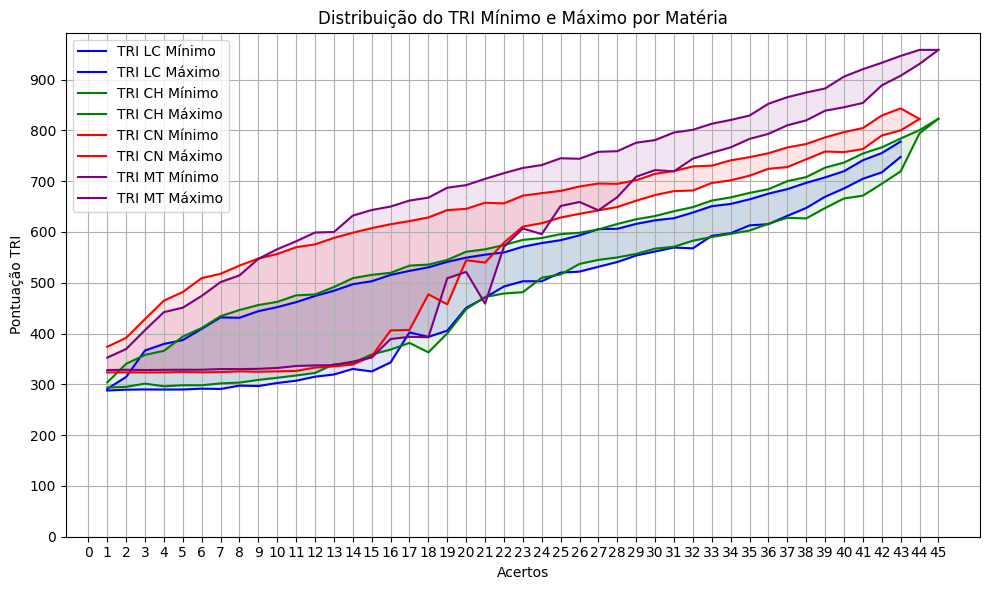

In [52]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as linhas para cada matéria
plt.plot(tri_min_max['questoes'], tri_min_max['tri_lc_min'], label='TRI LC Mínimo', color='blue')
plt.plot(tri_min_max['questoes'], tri_min_max['tri_lc_max'], label='TRI LC Máximo', color='blue')

plt.plot(tri_min_max['questoes'], tri_min_max['tri_ch_min'], label='TRI CH Mínimo', color='green')
plt.plot(tri_min_max['questoes'], tri_min_max['tri_ch_max'], label='TRI CH Máximo', color='green')

plt.plot(tri_min_max['questoes'], tri_min_max['tri_cn_min'], label='TRI CN Mínimo', color='red')
plt.plot(tri_min_max['questoes'], tri_min_max['tri_cn_max'], label='TRI CN Máximo', color='red')

plt.plot(tri_min_max['questoes'], tri_min_max['tri_mt_min'], label='TRI MT Mínimo', color='purple')
plt.plot(tri_min_max['questoes'], tri_min_max['tri_mt_max'], label='TRI MT Máximo', color='purple')

# Preenchendo as áreas entre as linhas mínimas e máximas
plt.fill_between(tri_min_max['questoes'], tri_min_max['tri_lc_min'], tri_min_max['tri_lc_max'], color='blue', alpha=0.1)
plt.fill_between(tri_min_max['questoes'], tri_min_max['tri_ch_min'], tri_min_max['tri_ch_max'], color='green', alpha=0.1)
plt.fill_between(tri_min_max['questoes'], tri_min_max['tri_cn_min'], tri_min_max['tri_cn_max'], color='red', alpha=0.1)
plt.fill_between(tri_min_max['questoes'], tri_min_max['tri_mt_min'], tri_min_max['tri_mt_max'], color='purple', alpha=0.1)

# Adicionando título e rótulos
plt.title('Distribuição do TRI Mínimo e Máximo por Matéria')
plt.xlabel('Acertos')
plt.ylabel('Pontuação TRI')
plt.legend()
plt.xticks(range(0, 46, 1))
plt.yticks(range(0, 1000, 100))

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Copiando o DataFrame para não alterar o original
correspondencia_acertos = tri_min_max.copy()

# Adicionando as colunas 'corresp_min_*' e 'corresp_max_*' para cada matéria
correspondencia_acertos['corresp_min_lc'] = correspondencia_acertos['questoes']
correspondencia_acertos['corresp_max_lc'] = correspondencia_acertos['questoes']
correspondencia_acertos['corresp_min_ch'] = correspondencia_acertos['questoes']
correspondencia_acertos['corresp_max_ch'] = correspondencia_acertos['questoes']
correspondencia_acertos['corresp_min_cn'] = correspondencia_acertos['questoes'] 
correspondencia_acertos['corresp_max_cn'] = correspondencia_acertos['questoes'] 
correspondencia_acertos['corresp_min_mt'] = correspondencia_acertos['questoes']
correspondencia_acertos['corresp_max_mt'] = correspondencia_acertos['questoes']

# Passando por cada valor de 'tri_min' para cada matéria e verificando na coluna de 'tri_max'
for idx, row in correspondencia_acertos.iterrows():
    # Para LC
    tri_min_lc = row['tri_lc_min']
    for idx_max, row_max in correspondencia_acertos.iterrows():
        if row_max['tri_lc_max'] > tri_min_lc:
            correspondencia_acertos.at[idx, 'corresp_max_lc'] = row_max['questoes']
            break  # Saímos do loop assim que encontrarmos a primeira correspondência
    
    # Para CH
    tri_min_ch = row['tri_ch_min']
    for idx_max, row_max in correspondencia_acertos.iterrows():
        if row_max['tri_ch_max'] > tri_min_ch:
            correspondencia_acertos.at[idx, 'corresp_max_ch'] = row_max['questoes']
            break
    
    # Para CN
    tri_min_cn = row['tri_cn_min']
    for idx_max, row_max in correspondencia_acertos.iterrows():
        if row_max['tri_cn_max'] > tri_min_cn:
            correspondencia_acertos.at[idx, 'corresp_max_cn'] = row_max['questoes']
            break
    
    # Para MT
    tri_min_mt = row['tri_mt_min']
    for idx_max, row_max in correspondencia_acertos.iterrows():
        if row_max['tri_mt_max'] > tri_min_mt:
            correspondencia_acertos.at[idx, 'corresp_max_mt'] = row_max['questoes']
            break

In [54]:
correspondencia_acertos = correspondencia_acertos[['corresp_min_lc', 'corresp_max_lc', 'corresp_min_ch', 'corresp_max_ch',
                                                   'corresp_min_cn', 'corresp_max_cn', 'corresp_min_mt', 'corresp_max_mt']]

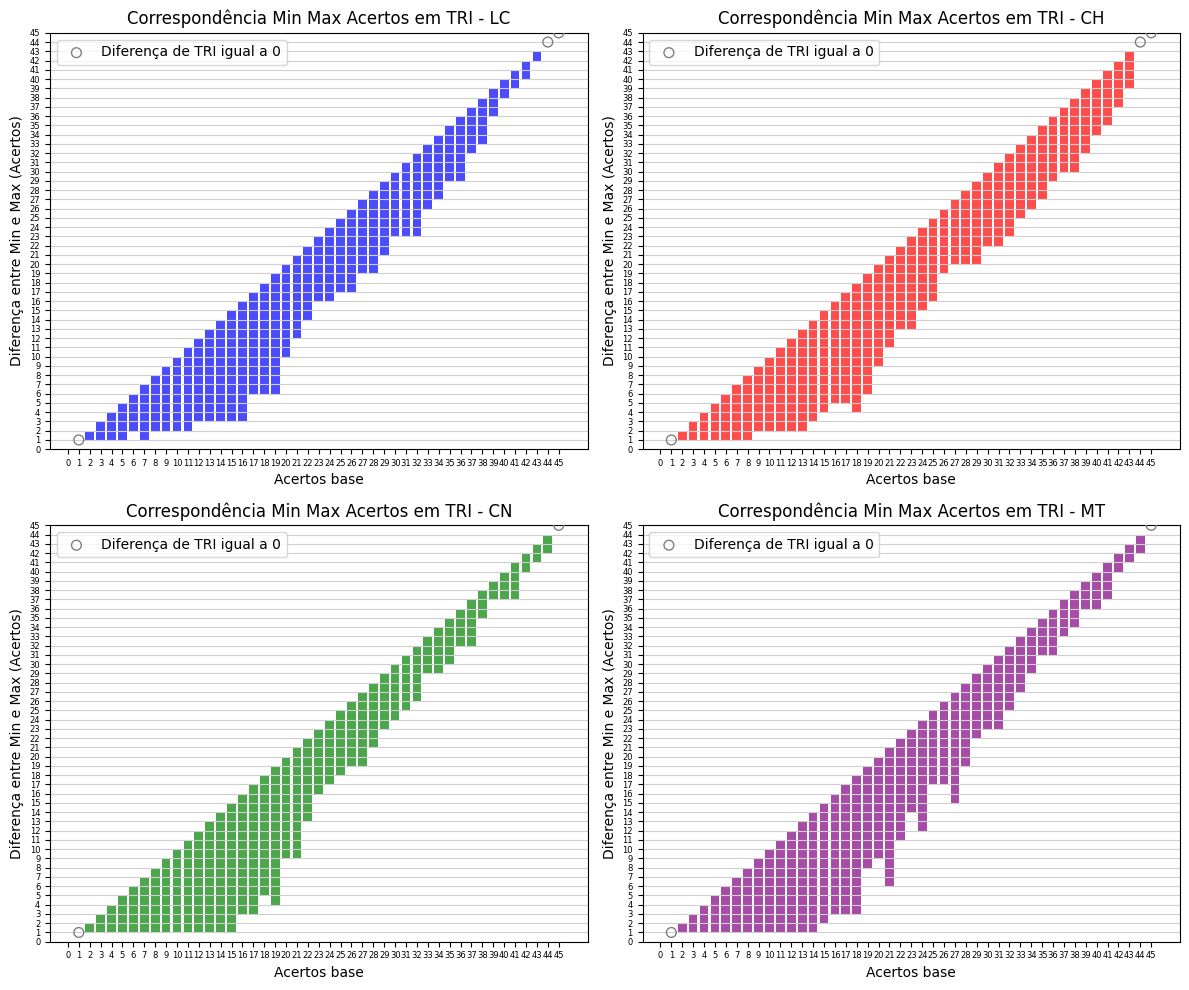

In [55]:

# Criando um grid 2x2 de gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotando para cada matéria em cada subgráfico
materias = ['lc', 'ch', 'cn', 'mt']
colors = {'lc': 'blue', 'ch': 'red', 'cn': 'green', 'mt': 'purple'}
for i, materia in enumerate(materias):
    ax = axes[i//2, i%2]  # Selecionando o subgráfico apropriado
    corresp_min_col = f'corresp_min_{materia}'
    corresp_max_col = f'corresp_max_{materia}'
    
    # Plotando as barras para cada matéria
    ax.bar(correspondencia_acertos[corresp_min_col], 
           correspondencia_acertos[corresp_max_col] - correspondencia_acertos[corresp_min_col], 
           bottom=correspondencia_acertos[corresp_min_col], 
           color=colors[materia], alpha=0.7)
    
    # Condição para identificar onde a diferença entre 'corresp_max' e 'corresp_min' é zero
    small_bar_condition = (correspondencia_acertos[corresp_max_col] - correspondencia_acertos[corresp_min_col] == 0)
    
    # Adicionando bolinhas cinzas para os casos onde a diferença é zero
    ax.scatter(correspondencia_acertos[small_bar_condition][corresp_min_col], 
               correspondencia_acertos[small_bar_condition][corresp_min_col], 
               s=50, marker='o', edgecolor='gray', facecolor='none', label='Diferença de TRI igual a 0', zorder=5)
    
    # Adicionando título e rótulos aos eixos
    ax.set_title(f'Correspondência Min Max Acertos em TRI - {materia.upper()}')
    ax.set_xlabel(f'Acertos base')
    ax.set_ylabel('Diferença entre Min e Max (Acertos)')
    ax.set_xticks(range(0, 46, 1))
    ax.set_xticklabels(range(0, 46, 1), fontsize=6)
    ax.set_yticks(range(0, 46, 1))
    ax.set_yticklabels(range(0, 46, 1), fontsize=6)
    
    # Ativando a grade no eixo Y
    ax.grid(axis='y', color='#cfcfcf')
    
    # Exibindo a legenda para cada gráfico
    ax.legend()

# Ajustando o layout
plt.tight_layout()
plt.show()